<a href="https://colab.research.google.com/github/ikramhasanli/demo-repo/blob/main/ENCE_3503_Fall_2024_hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENCE 3503: Fall 2024 Homework 2

## Submission Instructions
**Latest attempt** will be graded. Not following any one of the instructions below will result in **zero grade**:

- Rename your file by including your student information (Name and ID): **ENCE_3503_Fall_2024_hw02_StudentName_ID.ipynb**
- Submit your updated `.ipynb` file to your **Github Classroom Repository** (accept it at: https://classroom.github.com/a/5w6zTZ3-)
- Submit your updated `.ipynb` file to **Blackboard**.
- Update **Student Information** (see below).

## Student Information

**Full Name:** Ikram Hasanli

**ID:** 15235

**Github Repository URL:** https://github.com/ADA-SITE-ENCE-3503/pandas-matplotlib-ikramhasanli

## Homework Instructions

In all tasks, you should preferably **add additional cells and markdown comments** as necessary. You should handle possible **exceptional cases** and test your functions. Generally, you have flexibility on how you handle the problem, but all the written **instructions** must be met. Your code should be clear and understandable. Don't remove any comment/cell that the notebook already has.

Download **IMDB Top 1000** movies database (`.csv`) file from https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows.

In [ ]:
# Import libraries (run the cell)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Uncomment and run the code below if you are working in google colab to upload the csv
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/imdb_top_1000.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Update the csv filepath below accordingly and run this cell to import csv
filepath = "/content/drive/MyDrive/imdb_top_1000" # update this line
imdb = pd.read_csv(filepath + '.csv')

In [ ]:
# The code below is for grading. It is ok to run such cells, but you won't use them.
task = np.zeros(100, dtype=np.uint8)

In [ ]:
# Print out columns, then rename them however you wish (make them simpler).
print('Original columns: ', imdb.columns)
imdb.rename(columns={'Poster_Link': 'poster', 'Series_Title': 'title', 'Released_Year': 'year', 'Certificate': 'certificate', 'Runtime': 'runtime', 'Genre':'genre', 'IMDB_Rating': 'rating', 'Overview': 'overview', 'Meta_score': 'metascore', 'Director': 'director', 'Star1': 'star1', 'Star2': 'star2', 'Star3': 'star3', 'Star4': 'star4', 'No_of_Votes': 'votes', 'Gross': 'gross'}, inplace=True) #I simplified the words for much easier future usage (by trying to avoid '_' or uppercase letters)
# Drop/delete poster column.
imdb.drop('poster', axis=1, inplace=True) #Via curiosity, I realized for this to run, this box should run once only (as afterwards, there will not be any 'poster' column anymore, and it will not be able to be removed, which leads to an error)
print('New columns: ', imdb.columns)
# Show first 3 rows.
print(imdb.head(3)) #it did not print without print
task[1] = 1 # Task 1 gives 1 point.

Original columns:  Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')
New columns:  Index(['title', 'year', 'certificate', 'runtime', 'genre', 'rating',
       'overview', 'metascore', 'director', 'star1', 'star2', 'star3', 'star4',
       'votes', 'gross'],
      dtype='object')
                      title  year certificate  runtime                 genre  \
0  The Shawshank Redemption  1994           A  142 min                 Drama   
1             The Godfather  1972           A  175 min          Crime, Drama   
2           The Dark Knight  2008          UA  152 min  Action, Crime, Drama   

   rating                                           overview  metascore  \
0     9.3  Two imprisoned men bond over a number of years...       80.0   
1     9.2  An organized crime dynasty's aging patriarch t..

In [ ]:
# Show relevant statistics about the data (e.g. five number summary).
print(imdb.describe()) #this code shows basic relevant statistics for numerical columns, there seems to be string values in 'Year' and 'gross' columns because they were not printed. Also, in 'runtime' the statistics cannot be calculated because of 'min'
# Explain what you understand from this summary.
task[2] = 3

            rating   metascore         votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06


In [ ]:
# Analyze your data. Is there missing (NaN) or incorrect values? What are they? # there seems to be string values in 'Year' and 'gross' columns because they were not printed. Also, in 'runtime' the statistics cannot be calculated because of 'min'
# Are there imprecise data types (e.g. string instead of integer)? Fix/populate them.
imdb['year'] = pd.to_numeric(imdb['year'], errors='coerce') #year column has strings instead of ints in some rows, so we are ensuring that they are shown as "NaN" not to affect the result
imdb['gross'] = imdb['gross'].astype(str).str.replace(r'[$,]', '', regex=True) # we remove "$" sings from this (I wrote it with 2 lines because in the previous there were not mixtures of int and string in 1 line, but separate)
imdb['gross'] = pd.to_numeric(imdb['gross'], errors='coerce') # we change all the non-numeric values (strings) to "NaN"
imdb['runtime'] = imdb['runtime'].astype(str).str.replace(r' min', '', regex=True) #removing the 'min' str to calculate the mean
imdb['runtime'] = pd.to_numeric(imdb['runtime'], errors='coerce')  # considering all the non-numeric values in this column as "NaN"
for a in ['year', 'votes', 'metascore', 'gross', 'runtime']: #we replace "NaN"s with the mean to make it accurate
    imdb[a] = imdb[a].fillna(imdb[a].mean()) #filling NaN with the mean values
task[3] = 4

In [ ]:
# Generate statistics again. What new do you see? What does it tell you?
print(imdb.describe()) #printing 5 number summary
# I see that all the 5 num summary has been accurately calculated. The string values have first been replaced with NaN, and then they have been replaced with mean values. This is why the 5 number summary is shown right
task[4] = 2

              year      runtime       rating   metascore         votes  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1.000000e+03   
mean   1991.217217   122.891000     7.949300    77.97153  2.736929e+05   
std      23.285362    28.093671     0.275491    11.36206  3.273727e+05   
min    1920.000000    45.000000     7.600000    28.00000  2.508800e+04   
25%    1976.000000   103.000000     7.700000    72.00000  5.552625e+04   
50%    1999.000000   119.000000     7.900000    77.97153  1.385485e+05   
75%    2009.000000   137.000000     8.100000    85.25000  3.741612e+05   
max    2020.000000   321.000000     9.300000   100.00000  2.343110e+06   

              gross  
count  1.000000e+03  
mean   6.803475e+07  
std    1.000371e+08  
min    1.305000e+03  
25%    5.012919e+06  
50%    4.238945e+07  
75%    6.803475e+07  
max    9.366622e+08  


In [ ]:
# Write a function which will return N highest rated movies of a given year.
# It should accept dataframe, year and movie count N and return a new dataframe with top movies from imdb.
# It should also be possible to get movies by metascore, instead of imdb rating.
def rankingmovies(df):  # function that returns the n-highest-rated movies of a given year
    while True: #I decided to make it sustainable so that user will enter the values untill it gets valid
        year_input = input("Enter the year (earliest being 1920): ") #user inputting the year for year
        if year_input.isdigit() and int(year_input) >= 1920: #Error values, I chose 1920 because the earliest movie is 1920 (checked by imdb['year'].min())
            year = int(year_input) #year is integer
            break #stop
        print(f"movies not found for {year_input}. Please enter a valid year(earliest being 1920).") #printing that untill valid input

    while True: #untill user input is right/as many times
        cnt = input("Enter the number of top movies to retrieve: ") #user inputting the movie number for cnt
        if cnt.isdigit() and int(cnt) > 0: #Error value would be anything less than 1 because it needs at least 1 movie to rate
            n = int(cnt) #again int because we are working with integers
            break #stop when it is right
        print("There should be at least one movie") #print that the input is not valid

    while True:
        by = input("Sort by 'rating' or 'metascore': ") #user chooses to rank either by rating or metascore
        if by in ['rating', 'metascore']:
            break
        print("Please choose either 'rating' or 'metascore'") #outputs this until user chooses one of them as a valid input

    movies_of_year = df[df['year'] == year]  #filtering movies by year

    if movies_of_year.empty:  # Checks if it is empty, and if it is, outputs the below text
        print(f"no movies found for {year}")
        return None

    if by == 'rating': #sorting movies
        top_movies = movies_of_year.sort_values(by='rating', ascending=False).head(n) #sorting movies by rating
    else:
        top_movies = movies_of_year.sort_values(by='metascore', ascending=False).head(n) #sorting movies by metascore

    return top_movies #returning the top_movies (ranking)

top_movies_df = rankingmovies(imdb) #calling the function to show the result (ranking) for user input

if top_movies_df is not None: #if not empty, print
    print(top_movies_df)

task[5] = 5

Enter the year (earliest being 1920): 1919
movies not found for 1919. Please enter a valid year(earliest being 1920).
Enter the year (earliest being 1920): 1920
Enter the number of top movies to retrieve: 10
Sort by 'rating' or 'metascore': rating
                            title    year certificate  runtime  \
321  Das Cabinet des Dr. Caligari  1920.0         NaN       76   

                        genre  rating  \
321  Fantasy, Horror, Mystery     8.1   

                                              overview  metascore  \
321  Hypnotist Dr. Caligari uses a somnambulist, Ce...   77.97153   

         director          star1         star2            star3        star4  \
321  Robert Wiene  Werner Krauss  Conrad Veidt  Friedrich Feher  Lil Dagover   

     votes         gross  
321  57428  6.803475e+07  


In [47]:
# Print out the highest rated movie of every decade (e.g. 1980s) using your function above.
def highest_rated_per_dec(df): #creating a function for it
    decades = range(1920, 2021, 10) #I found the last movie year to be 2020 by the function imdb['year].max()
    for start_decade in decades:
        end_decade = start_decade + 9 #creates a start of each decade (each decade starts from 0 till 9 (1920-1929) so it identifies the end of a decade as start+9)
        decade_movies = df[(df['year'] >= start_decade) & (df['year'] <= end_decade)] #indexing by year. this dataframe (called decade_movies) checks the movies released within the decade
        if not decade_movies.empty:
            highest_rated = decade_movies.loc[decade_movies['rating'].idxmax()] #finding the highest rated movie by finding biggest index
            print(f"highest rated movie of the {start_decade}s: {highest_rated['title']} (Rating: {highest_rated['rating']})") #printing
highest_rated_per_dec(imdb) #printing the function (the ratings of the highest ranked movie for each decade)
task[6] = 5

highest rated movie of the 1920s: Metropolis (Rating: 8.3)
highest rated movie of the 1930s: Modern Times (Rating: 8.5)
highest rated movie of the 1940s: It's a Wonderful Life (Rating: 8.6)
highest rated movie of the 1950s: 12 Angry Men (Rating: 9.0)
highest rated movie of the 1960s: Il buono, il brutto, il cattivo (Rating: 8.8)
highest rated movie of the 1970s: The Godfather (Rating: 9.2)
highest rated movie of the 1980s: Star Wars: Episode V - The Empire Strikes Back (Rating: 8.7)
highest rated movie of the 1990s: The Shawshank Redemption (Rating: 9.3)
highest rated movie of the 2000s: The Dark Knight (Rating: 9.0)
highest rated movie of the 2010s: Inception (Rating: 8.8)
highest rated movie of the 2020s: Hamilton (Rating: 8.6)


In [ ]:
# Write a function which will get the commercially most successful N directors.
def successful_directors(df, n):
  director_gross = df.groupby('director')['gross'].sum() #using director and gross columns to group them together (to find the ones who get most money)
  top_directors = director_gross.sort_values(ascending=False).head(n) #sorting gross in decreasing order

  return top_directors

while True: #letting user input as many times
    try:
        n = int(input("the number of directors: "))  #user inputting
        if n <= 0: #invalid input case
            print("There should be at least 1 director")
            continue
        break  #if input is valid
    except ValueError: #str or float
        print("Invalid input. Please enter a positive integer.") #this output will be shown unless the input is right

top_num_directors = successful_directors(imdb, n) #call the function with user input, n and imdb(the columns director and gross)
print(top_num_directors)

task[7] = 5

the number of directors: 0
There should be at least 1 director
the number of directors: -1
There should be at least 1 director
the number of directors: 100
director
Steven Spielberg     2.478133e+09
Anthony Russo        2.205039e+09
Christopher Nolan    1.937454e+09
James Cameron        1.748237e+09
Peter Jackson        1.597312e+09
                         ...     
Rich Moore           1.894229e+08
Kevin Costner        1.842088e+08
Andrew Davis         1.838758e+08
Steven Soderbergh    1.834172e+08
Spike Lee            1.772897e+08
Name: gross, Length: 100, dtype: float64


In [ ]:
# Write a function which will get the commercially most successful N actors.
def successful_actors(df, n):
  #actor_gross = df.groupby[('star1')['gross'].sum(), ('star2')['gross'].sum(), ('star3')['gross'].sum(), ('star4')['gross'].sum()] #using actor columns to group them together (to find the ones who get most money)
  actors_and_gross = df.melt(id_vars=['gross'], value_vars=['star1', 'star2', 'star3', 'star4'], var_name='star_role', value_name='actor') #melt is used in pandas to represent several columns together bc they represent the same data type, so I merged star1 to star4 by the name of actors
  actor_gross = actors_and_gross.groupby('actor')['gross'].sum() #grouping by actor (previously merged star1 to star4)
  top_actors = actor_gross.sort_values(ascending=False).head(n) #sorting in decreasing (ascending=False) order
  return top_actors

while True: #letting user input many times (condition based)
    try:
        n = int(input("the number of successful actors: "))  #user inputting
        if n<=0: #invalid input case
            print("There should be at least 1 actor")
            continue
        break  #if input is valid
    except ValueError: #str or float
        print("Invalid input. Please enter a positive integer.") #this output will be shown unless the input is right

top_actors = successful_actors(imdb, n)
print(top_actors)

task[9] = 5

the number of successful actors: 10
actor
Robert Downey Jr.    3.129073e+09
Tom Hanks            2.903565e+09
Chris Evans          2.339664e+09
Joe Russo            2.205039e+09
Mark Ruffalo         2.126430e+09
Leonardo DiCaprio    2.049297e+09
Ian McKellen         1.869869e+09
Rupert Grint         1.835901e+09
Daniel Radcliffe     1.835901e+09
Matt Damon           1.728542e+09
Name: gross, dtype: float64


In [ ]:
# Write a function to find actors who starred the most amount of times in top movies.
# (imdb rating 8 or more, metascore 90 or more)
def actors_starred_most(df):
  top_movies = df[(df['rating'] >= 8) & (df['metascore'] >= 90)] #imdb rating 8 or more, metascore 90 or more
  list_of_actors = pd.concat([top_movies['star1'], top_movies['star2'], top_movies['star3'], top_movies['star4']]) #this concat function helps to call several columns at the same time, and we call all the ones with actors
  actor_cnt =list_of_actors.value_counts() #counting how many time they have appeared
  return actor_cnt

actor_cnt = actors_starred_most(imdb) #calling the main function imdb to retrieve
print(actor_cnt)
# Who is at the top of the list?
print("actor at the top of the list:", actor_cnt.index[0]) #printing the actor at the top of the list
task[8] = 5

James Stewart      5
Marlon Brando      4
Robert De Niro     3
Orson Welles       3
Humphrey Bogart    3
                  ..
Merna Kennedy      1
Sam Wood           1
Mark Hamill        1
Jean Martin        1
Ivan Bobrov        1
Name: count, Length: 347, dtype: int64
actor at the top of the list: James Stewart


In [ ]:
# Write a function which will find the highest rated movie by a given genre.
# Both imdb rating and metascore options should exist.
# Add a flag which will choose among movies with only one genre (e.g. just Comedy)
def highest_rated_movie_by_genre(df, genre, by='rating', single_genre=False): #genre, rating, and considering movies with all genres
  if single_genre: # single_genre is set to true (movies with a single genre) are:
        moviegenre=df[df['genre'].str.contains(',', na=True)] #if there is no ',' in a list of genres, it basically means that there is just one genre
        moviegenre=moviegenre[moviegenre['genre'].str.contains(genre, case=False, na=False)] #moviegenre is a subsite of df, only including single genre movies. It accesses the genre column of imdb. case=False ignores the upper/lowercase scenario(Comedy=comedy), na=False ignores NaN values so that they are not involved in the results
  else:
        moviegenre = df[df['genre'].str.contains(genre, case=False, na=False)] #the function takes all the genres of multi-genre movies
  if moviegenre.empty: #if nothing is inputted
        print(f"no movies found for {genre}") #print this
        return None
  if by== 'rating': #if user chooses to classify by rating
        highest_rated = moviegenre.loc[moviegenre['rating'].idxmax()] #loc function accesses the rating colum (using the highest index finds the highest rated based on rating)
  elif by == 'metascore': #if user chooses metascore criteria
        highest_rated = moviegenre.loc[moviegenre['metascore'].idxmax()] #loc function acceses the metascore column (using the highest index finds the highest rated based on metascore)
  else: #if invalid
        print("Please choose either 'rating' or 'metascore'") #invalid input
        return None

  return highest_rated

genre_input= input("enter the genre: ") #user inputs the movie genre
single_genre_input = input("Consider movies with only one genre ('yes' or 'no'):").strip().lower()
rtng_type = input("based on 'rating' or 'metascore'? ").strip().lower() #extra spaces (by strip()) are ignored and the same about uppercases, they are transformed to lowercases (lowwer())
highest_movie =highest_rated_movie_by_genre(imdb, genre_input, by=rtng_type) #defining highes_movie as the genre
if highest_movie is not None: #if there is a valid result
   print(f"Highest rated movie in genre {genre_input} (based on {rtng_type}): {highest_movie['title']} (Rating:{highest_movie['rating']}, Metascore:{highest_movie['metascore']})") #organizing the sentence to first show the genre, then the criteria (rating/metascore), then the movie name, and I also decided to include both rating and metascore as well for clarity
task[10] = 5

enter the genre: comedy
Consider movies with only one genre ('yes' or 'no'):yes
based on 'rating' or 'metascore'? rating
Highest rated movie in genre comedy (based on rating): Gisaengchung (Rating:8.6, Metascore:96.0)


In [ ]:
# Get all the possible genres and store them in a Series variable.
all_genres = imdb['genre'].str.split(', ').explode().unique() #creates unique genres from the genre column (separates them by ',' and by the unique() function chooses one of the duplicates. I learned that by using explode() I can write each genre in every new row, so I used it as well (it  helps to put the multiple-genre movies' genres on different rows with the same movie name))
all_genres_series = pd.Series(all_genres) #each unique genre is now a row of Pd Series
# Call the function you created and print out the top movies by every genre.
for badambura in all_genres_series: #for a genre from all genres
    highest_ranked_movie = highest_rated_movie_by_genre(imdb, badambura) #genre(badambura) in imdb
    if  highest_ranked_movie is not None: #if valid (the function succesfuly found the movie)
        print(f"Highest rated movie in the genre of {badambura}: {highest_ranked_movie['title']} (Rating:{highest_ranked_movie['rating']}, Metascore:{highest_ranked_movie['metascore']})") #showing the genre, highest rated movie name, and its rating as well as metascore
task[11] = 5

Highest rated movie in the genre of Drama: The Shawshank Redemption (Rating:9.3, Metascore:80.0)
Highest rated movie in the genre of Crime: The Godfather (Rating:9.2, Metascore:100.0)
Highest rated movie in the genre of Action: The Dark Knight (Rating:9.0, Metascore:84.0)
Highest rated movie in the genre of Adventure: The Lord of the Rings: The Return of the King (Rating:8.9, Metascore:94.0)
Highest rated movie in the genre of Biography: Schindler's List (Rating:8.9, Metascore:94.0)
Highest rated movie in the genre of History: Schindler's List (Rating:8.9, Metascore:94.0)
Highest rated movie in the genre of Sci-Fi: Inception (Rating:8.8, Metascore:74.0)
Highest rated movie in the genre of Romance: Forrest Gump (Rating:8.8, Metascore:82.0)
Highest rated movie in the genre of Western: Il buono, il brutto, il cattivo (Rating:8.8, Metascore:90.0)
Highest rated movie in the genre of Fantasy: Star Wars: Episode V - The Empire Strikes Back (Rating:8.7, Metascore:82.0)
Highest rated movie in t

In [77]:
# Write a function which will find the most common genre by a decade.
def most_common_genre_decade(df):
    decades = range(1920, 2021, 10) #the last movie year is 2020, and the first is in 1920 (found by the function imdb['year].max(), and each decade is 10 years; imdb['year'].min() for 1920)
    for start_decade in decades:
        end_decade = start_decade + 9 #defines the end of a decade by adding 9 to the start of a decade
        decade_movies = df[(df['year'] >= start_decade) & (df['year'] <= end_decade)] #each decade starts from 00s and ends in 09s. this dataframe (called decade_movies) checks the movies released within the decade
        if not decade_movies.empty: #if the dataframe decade_movies (movies in each decade) is not empty (there are movies in a decade)
          genre_counts = decade_movies['genre'].str.split(', ').explode().value_counts() #splits the genres (by split, as movies can have multiple genres seen from previous tasks), transform each genre into separate row(explode() and then counts the number of genres (how many times they were repeated)
          the_most_common = genre_counts.index[0] #as value_counts() sorts in descending order, the first element (0 index) will be the most common one
          print(f"The most common movie genre in the {start_decade}s: {the_most_common}")
        else: #if the dataframe is empty (which is not the case)
          print(f"There were no movie in the{start_decade}s")
most_common_genre_decade(imdb) #printing the function (the ratings of the highest ranked movie for each decade)

# What is the most common genre of 1970s? Or 1980s? Why? #-Drama, because of the imdb document first of all. Secondly, I believe Godfather movie series might have led to this
task[12] = 5



The most common movie genre in the 1920s: Drama
The most common movie genre in the 1930s: Drama
The most common movie genre in the 1940s: Drama
The most common movie genre in the 1950s: Drama
The most common movie genre in the 1960s: Drama
The most common movie genre in the 1970s: Drama
The most common movie genre in the 1980s: Drama
The most common movie genre in the 1990s: Drama
The most common movie genre in the 2000s: Drama
The most common movie genre in the 2010s: Drama
The most common movie genre in the 2020s: Drama


In [99]:
# Find great movies which are not well known.
# Get movie names which have 20,000 votes or less, while
# having rating of 8 or more. Make an option for metascore (90 or more).
def great_movies_horrible_audience(df, criteria='rating'):
    filtered_movies = df[df['votes'] <= 20000]#filtering movies with 20000 votes or less

    if criteria == 'metascore': #filtering based on metascore being more or equal to 90
        great_movies = filtered_movies[filtered_movies['metascore'] >= 90]
    elif criteria == 'rating': #filtering based on ranking being more or equal to 8
        great_movies = filtered_movies[filtered_movies['rating'] >= 8]

    if great_movies.empty: #if nothing found
        print(f"No great movies found based on the criteria: {criteria}")
        return None

    return great_movies[['title']] #movies if meet the criteria

lesmiserablemovies = great_movies_horrible_audience(imdb, criteria='rating') #selecting the movies based on the criteria of rating column
print(f"Great movies with rating of 8 or more and 20,000 votes or less: {lesmiserablemovies}") #printing the great movies

movies_by_metascore = great_movies_horrible_audience(imdb, criteria='metascore') #selecting the movies based on the criteria of metascore column
print(f"Great movies with metascore of 90 or more and 20,000 votes or less: {movies_by_metascore}") #printing the great movies


task[13] = 5

No great movies found based on the criteria: rating
Great movies with rating of 8 or more and 20,000 votes or less: None
No great movies found based on the criteria: metascore
Great movies with metascore of 90 or more and 20,000 votes or less: None


In [118]:
# Write a function which will return a dictionary of statistics about a director:
# - Movie Title Series with year
def movie_statistics(df, director):
  director_stats = df[df['director'] == director] #filtering to get all the movies directed by a specific director

  if director_stats.empty: #if no director found
    return "Could not find any director"

  statistics = {} #creating an empty dictionary called statistics
  statistics['movie_titles'] = director_stats[['title', 'year']].to_dict(orient='records') #selects the title and year columns. orient='records' makes rows of each dictionary element (key/value pair; in this case, movie title and year)

# - Best rated movie(s)
# - Worst rated movie(s)
  best_movies = director_stats.loc[director_stats['rating'].idxmax()] #found via the highest ranking
  statistics['best_rated_movies'] = best_movies.to_dict() #transform the best_rated_movies to our dictionary
  worst_movies = director_stats.loc[director_stats['rating'].idxmin()] #the lowest ranking
  statistics['worst_rated_movies'] = worst_movies.to_dict() #transform the worst_rated_movies to our dictionary
# - The average imdb rating of movies
  statistics['average_imdb_rating'] = director_stats['rating'].mean() #average found by mean of rating column
# - The average metascore of movies
  statistics['average_metascore'] = director_stats['metascore'].mean() #average found by mean of metascore column
# - The average runtime of movies
  statistics['average_runtime'] = director_stats['runtime'].mean() #average found by mean of runtime column
# - The total gross (box office) revenue
  statistics['total_gross'] = director_stats['gross'].sum() #total gross found by the sum of everything in gross column

# - Genres of movies directed
  all_genres = director_stats['genre'].str.split(', ').explode().unique() #separating the genres in genre column and finding the unrepeated ones
  statistics['genres'] = list(all_genres) #transforming all unique elements to a list

  return statistics #return the statistics dictionary
director_name = input(str("Please enter a director name: ")) #user inputs the director name
director_data = movie_statistics(imdb, director_name) #calling the function for the given director
if isinstance(director_data, dict): #if in the dictionary
  print(f"movie title series with year: {director_data['movie_titles']}") #returns movies and year (which was previously merged in the statistics['movie_titles'] together)
  print(f"best rated movies: {director_data['best_rated_movies']}") #printing best rated movies
  print(f"worst rated movies: {director_data['worst_rated_movies']}") #printing worst rated movies
else:
  print(director_data)  #printing this if director not found
task[14] = 10

Please enter a director name: Steven Spielberg
movie title series with year: [{'title': "Schindler's List", 'year': 1993.0}, {'title': 'Saving Private Ryan', 'year': 1998.0}, {'title': 'Raiders of the Lost Ark', 'year': 1981.0}, {'title': 'Indiana Jones and the Last Crusade', 'year': 1989.0}, {'title': 'Catch Me If You Can', 'year': 2002.0}, {'title': 'Jurassic Park', 'year': 1993.0}, {'title': 'Jaws', 'year': 1975.0}, {'title': 'The Color Purple', 'year': 1985.0}, {'title': 'E.T. the Extra-Terrestrial', 'year': 1982.0}, {'title': 'Empire of the Sun', 'year': 1987.0}, {'title': 'Bridge of Spies', 'year': 2015.0}, {'title': 'Minority Report', 'year': 2002.0}, {'title': 'Close Encounters of the Third Kind', 'year': 1977.0}]
best rated movies: {'title': "Schindler's List", 'year': 1993.0, 'certificate': 'A', 'runtime': 195, 'genre': 'Biography, Drama, History', 'rating': 8.9, 'overview': 'In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concer

Please enter the start year: 1980
Please enter the end year: 1990


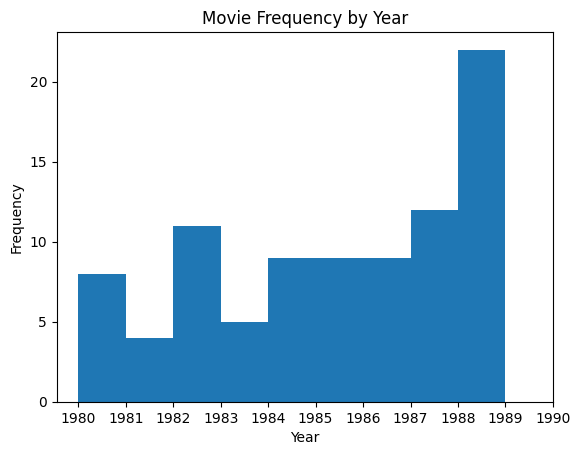

In [147]:
# Write a function which should plot a histogram showing movie frequency by every year
# Function should accept a range of start year and end year.
def movie_frequency_histogram(df, start_year, end_year):
  while True: #so that the user inputs until his/her input is valid
      try:
          start_year = int(input("Please enter the start year: ")) #user inputs the start year
          end_year = int(input("Please enter the end year: ")) #user inputs the end year
          if start_year < 1920 or end_year < 1920 or start_year > 2021 or end_year > 2021 or start_year > end_year: #all the invalid cases
              print("Invalid input. Please enter valid years (start_year <= end_year).") #printing if invalid input
              continue #restarting (continuing) the loop
          break #if the input is valid, stop and graph
      except ValueError: #if value is str or float
          print("Invalid, please enter valid(int) years") #prints if not valid
  filtered_df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

  plt.hist(filtered_df['year'], bins=range(start_year, end_year)) #adjusting bins so that they cover each year (even if nothing to show there)
  plt.xlabel("Year")  #setting the xlabel
  plt.ylabel("Frequency")  #setting the ylabel
  plt.title("Movie Frequency by Year")  #setting the graph title
  plt.xticks(range(start_year, end_year + 1)) #showing range from start (input) to the end(input) +1 (because the end will not show the inputted end year but 1 smaller)
  plt.show()

movie_frequency_histogram(imdb, start_year, end_year) #plotting the histogram

task[15] = 10

Please, enter the director names separated by commas: Frank Darabont,Steven Spielberg


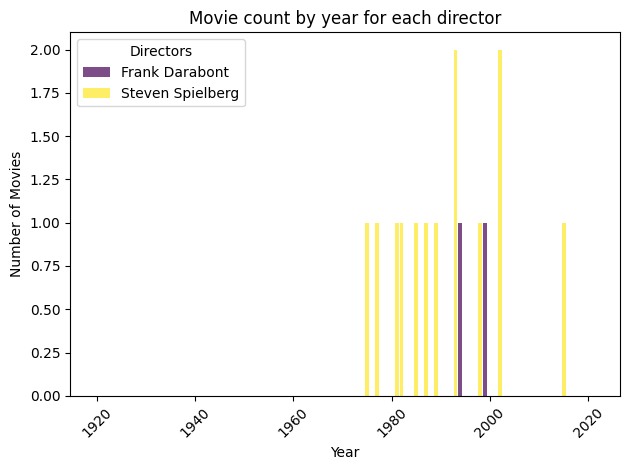

In [176]:
# Write a function which will accept a numpy array of director names
# and generate a bar chart based on the movie count of each director
def directors_and_histograms(df):
    directors_input = input("Please, enter the director names separated by commas: ") #asking the user for input
    director_names = [director.strip() for director in directors_input.split(',')] #splitting the director_names by each director
    movie_counts = {director: {year: 0 for year in range(1920, 2022)} for director in director_names} #movie count is for the director for each year (we show the range in the bottom to make the histogram effective)

    for director in director_names:
        for year in range(1920, 2022):
            count = df[(df['director'] == director) & (df['year'] == year)].shape[0] #each director for each year (so that the director matches the year as well)
            movie_counts[director][year] = count #assigns how many movies a director has

    colors = plt.cm.viridis(np.linspace(0, 1, len(director_names))) #generates random colors based on how many directors are inputted


    for badam, (director, moviecounts) in enumerate(movie_counts.items()): #taking the years for the director from the dictionary
        years = list(moviecounts.keys()) #years are the keys of a dictionary
        moviecounts = list(moviecounts.values()) #movie counts are the values of a dictionary
        plt.bar(years, moviecounts, color=colors[badam], label=director, alpha=0.7)  #creating a bar chart for each director with its paramenters

    plt.xlabel("Year")  #the x label of the chart
    plt.ylabel("Number of Movies")  #the y label of the chart
    plt.title("Movie count by year for each director")  #the title of the chart
    plt.xticks(rotation=45)  # Rotate x-ticks for better readability
    plt.legend(title="Directors")  # Show legend
    plt.tight_layout()  #making room by adjusting the layout
    plt.show()  #displaying the histogram

directors_and_histograms(imdb) #calling the function for the dataframe
task[16] = 10

In [ ]:
# Find and plot correlation between columns:
# - year and gross
# - year and runtime
# - runtime and gross
# - rating (for both imdb and metascore) and gross
# - rating and runtime
# Explain for each case why we may see such results
task[17] = 15

In [175]:
task.sum()

85